# EDA und nachstellen der SZ Ergebnisse

In [3]:
import pickle, gensim, numpy as np
import pandas as pd 

PICKLE_FOLDER_PATH = '/home/lisa/Darmstadt/Master Arbeit/06_Analyse/Plenum/'
Pickle_Path = '/home/lisa/Darmstadt/Master Arbeit/06_Analyse/Plenum/pickle_plenar/'
#df_date = pickle.load(open(PICKLE_FOLDER_PATH + 'df_comment_date_correct.pickle', "rb" )) # Datum drin und richtige cols aber Kommentare nicht mit RegEx gesplittet!
#df_all = pickle.load(open(PICKLE_FOLDER_PATH + 'df_comment_all.pickle_date', "rb" )) # Datum drin aber falsch
df = pickle.load(open(PICKLE_FOLDER_PATH + 'df_comment_all_date.pickle', "rb" )) # Aktueller Datensatz (ohne Label)

##### Bearbeiten bzw vereinheitlichen der Fraktions Spalte

In [7]:
import re

df['Fraktion'] = df['Fraktion'].replace(to_replace=r'(BÜNDNIS(SES)*\s90\/DIE\sGRÜNEN)[$:,]*(?i)', value='BÜNDNIS_90/DIE_GRÜNEN', regex=True)
df['Fraktion'] = df['Fraktion'].replace(to_replace=r'((DIE )*LINKE)[N$:,]*', value='DIE_LINKE', regex=True)
df['Fraktion'] = df['Fraktion'].replace(to_replace=r'(Fraktionslos(?i))', value='Fraktionslos', regex=True)
df['Fraktion'] = df['Fraktion'].replace(to_replace=r'(SPD.*)', value='SPD', regex=True)

df = df[(df['Fraktion'] != 'NaN')]
df = df[(df['Fraktion'] != 'Bremen')]
set(df['Fraktion'])

{'AfD',
 'BÜNDNIS_90/DIE_GRÜNEN',
 'CDU/CSU',
 'DIE_DIE_LINKE',
 'FDP',
 'Fraktionslos',
 'SPD'}

##### Sichten des Datensatzes

In [9]:
pd.set_option('display.max_rows', 5000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', 500)
pd.set_option('display.width', 1000)

df.columns
## Finde raus wieso nicht nur Parteien als Akteur in Kommentaren vergeben wurden

#df.loc[df['Bundesminister_Akteur1'].isna() == False]
# df.loc[df['SPD_Akteur1']]
# df.loc[df['BÜNDNIS_90/DIE_GRÜNEN_Akteur1'] == 'Margit Stumpp']
# df.loc[df['CDU/CSU_Akteur1'] == 'Jens Spahn']


# Es halndelt sich um 15 Zurufe oder Aktionen die Bundesministern zugeordnet wurden, diese teilen sich auf in:
# (Allerdings werden diese in anderen Fällen auch richtig zugeordnet - wenn ohne "Bundesminister" dokumentiert)
#Hubertus Heil[SPD]
#Heiko Maas[SPD]
#Jens Spahn[CDU]
#Dr. Gerd Müller[CSU]
#Horst Seehofer[CSU]
#Julia Klöckner[CDU]
#Christian Schmidt[CDU]

df = df[['Datum', 'TOP', 'Rede_ID', 'Titel', 'Vorname', 'Nachname', 'Fraktion', 'Beschreibung1', 'Beschreibung2', 
         'Rede_Text', 'Kommentar', 'SPD_Akteur1', 'SPD_Aktion1', 'SPD_Text1', 'SPD_Akteur2', 'SPD_Aktion2', 'SPD_Text2', 
         'FDP_Akteur1', 'FDP_Aktion1', 'FDP_Text1', 'FDP_Akteur2', 'FDP_Aktion2', 'FDP_Text2', 'AfD_Akteur1', 
         'AfD_Aktion1', 'AfD_Text1', 'AfD_Akteur2', 'AfD_Aktion2', 'AfD_Text2', 'CDU/CSU_Akteur1', 'CDU/CSU_Aktion1', 
         'CDU/CSU_Text1', 'CDU/CSU_Akteur2', 'CDU/CSU_Aktion2', 'CDU/CSU_Text2', 'BÜNDNIS_90/DIE_GRÜNEN_Akteur1', 
         'BÜNDNIS_90/DIE_GRÜNEN_Aktion1', 'BÜNDNIS_90/DIE_GRÜNEN_Text1', 'BÜNDNIS_90/DIE_GRÜNEN_Akteur2', 
         'BÜNDNIS_90/DIE_GRÜNEN_Aktion2', 'BÜNDNIS_90/DIE_GRÜNEN_Text2', 'DIE_LINKE_Akteur1', 'DIE_LINKE_Aktion1', 
         'DIE_LINKE_Text1', 'DIE_LINKE_Akteur2', 'DIE_LINKE_Aktion2', 'DIE_LINKE_Text2']]

# Die 15 Aktionen werden der Einfachheit halber irgnoriert

In [15]:
import datetime
df.loc[(df['Datum'] == datetime.datetime(2018,2,21))
       #&(df['TOP'] == 'Tagesordnungspunkt 1')
       &(df['Rede_ID'] == 'ID191306300')]

Datum            TOP      Rede_ID Titel Vorname Nachname Fraktion                       Beschreibung1                                            Beschreibung2                                                                                                                                                                                                                                                                                                                                                                                                                                                               Rede_Text                                                                                                                            Kommentar  SPD_Akteur1 SPD_Aktion1     SPD_Text1 SPD_Akteur2 SPD_Aktion2 SPD_Text2 FDP_Akteur1 FDP_Aktion1 FDP_Text1 FDP_Akteur2 FDP_Aktion2 FDP_Text2            AfD_Akteur1 AfD_Aktion1                           AfD_Text1             AfD_Akteur2  \
11712 2018-02-21  Zusatzpunkt 1  ID191306300   NaN  Marian    Wendt  CDU/CSU  auf Verlangen der Fraktion der AfD  Aktuelle Stunde Demonstrationsrechte von Frauen stärken                                                                                                                                                                                                                                                                                                                                                                                                                                                                    None                                                                                                                                  NaN                                                                                                                                                                                                                                               
11713 2018-02-21  Zusatzpunkt 1  ID191306300   NaN  Marian    Wendt  CDU/CSU  auf Verlangen der Fraktion der AfD  Aktuelle Stunde Demonstrationsrechte von Frauen stärken                                                                                                                                                                                                   Frau Präsidentin! Liebe Kolleginnen und Kollegen! Liebe Kollegen von der AfD, seien Sie in dieser Debatte doch ehrlich. Es geht Ihnen nicht um die Rechte von Frauen, sondern einfach um Provokation und um Selbstbestätigung in der vermeintlich eigenen Opferrolle.                                               Beifall bei der CDU/CSU, der SPD, der FDP, der DIE_LINKE und dem BÜNDNIS_90/DIE_GRÜNEN        ganze     Beifall                                                       ganze     Beifall                                                                                                                                              
11714 2018-02-21  Zusatzpunkt 1  ID191306300   NaN  Marian    Wendt  CDU/CSU  auf Verlangen der Fraktion der AfD  Aktuelle Stunde Demonstrationsrechte von Frauen stärken                                                                                                                                                                                                                                                                                                                                                     Frauenrechte sind Ihnen im Kern doch überhaupt nichts wert. Die vergangenen Monate haben das ganz deutlich gezeigt.                                               Beifall bei der CDU/CSU, der SPD, der FDP, der DIE_LINKE und dem BÜNDNIS_90/DIE_GRÜNEN        ganze     Beifall                                                       ganze     Beifall                                                                                                                                              
11715 2018-02-21  Z

## Zeitliche Eingrenzung des Datensatzes

In [3]:
df_comp = df.loc[df['Datum'] < '2018-4-24 00:00:00']
#df_all = df

In [124]:
df = df_comp

## Analyse der Reaktionen
#### Zusammenfassen von Aktionen und Gesamtübersicht 

In [73]:
df[['Fraktion', 'SPD_Aktion1','SPD_Aktion2','FDP_Aktion1', 'FDP_Aktion2', 'AfD_Aktion1', 'AfD_Aktion2',
       'CDU/CSU_Aktion1', 'CDU/CSU_Aktion2', 'BÜNDNIS_90/DIE_GRÜNEN_Aktion1', 'BÜNDNIS_90/DIE_GRÜNEN_Aktion2',
       'DIE_LINKE_Aktion1','DIE_LINKE_Aktion2', 'DIE_LINKE_Akteur1', 'DIE_LINKE_Akteur2']]

Fraktion SPD_Aktion1 SPD_Aktion2 FDP_Aktion1 FDP_Aktion2 AfD_Aktion1 AfD_Aktion2 CDU/CSU_Aktion1 CDU/CSU_Aktion2 BÜNDNIS_90/DIE_GRÜNEN_Aktion1 BÜNDNIS_90/DIE_GRÜNEN_Aktion2 DIE_LINKE_Aktion1 DIE_LINKE_Aktion2 DIE_LINKE_Akteur1 DIE_LINKE_Akteur2
12          SPD                                                                                                                                                                                                                                            
13          SPD                                                                                                                                                                                                                                            
14          SPD     Beifall                                                                                                                   Beifall                                         Beifall                               teile                  
15          SPD     Beifall                 Beifall                                                                                                                                           Beifall                               ganze                  
16          SPD     Beifall                                          Lachen                                                                                                                   Beifall                               teile                  
...         ...         ...         ...         ...         ...         ...         ...             ...             ...                           ...                           ...               ...               ...               ...               ...
232072  CDU/CSU                                                                                                                                                                                                                                            
232073  CDU/CSU                                                                                                                                                                                                                                            
232074  CDU/CSU                                                                                                                                                                                                                                            
232075  CDU/CSU                                                                                                                                                                                                                                            
232076  CDU/CSU     Beifall                                                                     Beifall                                       Beifall                                                                                                      

[213893 rows x 15 columns]

## Erste Übersicht - welche Partei macht was wie häufig?

In [5]:
# So oft tauchen die Parteien in den Daten pro Kategorie auf:
df_comment_akt = df[['Datum', 'Fraktion', 'SPD_Aktion1','SPD_Aktion2','FDP_Aktion1', 'FDP_Aktion2', 'AfD_Aktion1', 'AfD_Aktion2',
       'CDU/CSU_Aktion1', 'CDU/CSU_Aktion2', 'BÜNDNIS_90/DIE_GRÜNEN_Aktion1', 'BÜNDNIS_90/DIE_GRÜNEN_Aktion2',
       'DIE_LINKE_Aktion1','DIE_LINKE_Aktion2', 'DIE_LINKE_Akteur1', 'DIE_LINKE_Akteur2']]
# pd.pivot_table(df_comment_akt, index = 'SPD_Aktion2', aggfunc = np.count_nonzero )


parteien = ['SPD', 'FDP', 'AfD', 'CDU/CSU', 'BÜNDNIS_90/DIE_GRÜNEN', 'DIE_LINKE']

akt_Beifall = []
akt_Heiterkeit = []
akt_Lachen = []
akt_Zurufe = []
akt_Widerspruch = []

for partei in parteien:
    
    akt_Beifall.append(df_comment_akt.loc[(df_comment_akt[str(partei)+'_Aktion1'] == 'Beifall')
                       |(df_comment_akt[str(partei)+'_Aktion2'] == 'Beifall')
                       |(df_comment_akt[str(partei)+'_Aktion1'] == 'Heiterkeit und Beifall')
                       |(df_comment_akt[str(partei)+'_Aktion2'] == 'Heiterkeit und Beifall')
                      ]['SPD_Aktion1'].count())
    akt_Heiterkeit.append(df_comment_akt.loc[(df_comment_akt[str(partei)+'_Aktion1'] == 'Heiterkeit')
                       |(df_comment_akt[str(partei)+'_Aktion2'] == 'Heiterkeit')
                       |(df_comment_akt[str(partei)+'_Aktion1'] == 'Heiterkeit und Beifall')
                       |(df_comment_akt[str(partei)+'_Aktion2'] == 'Heiterkeit und Beifall')
                      ]['SPD_Aktion1'].count())
    akt_Lachen.append(df_comment_akt.loc[(df_comment_akt[str(partei)+'_Aktion1'] == 'Lachen')
                       |(df_comment_akt[str(partei)+'_Aktion2'] == 'Lachen')
                      ]['SPD_Aktion1'].count())
    akt_Zurufe.append(df_comment_akt.loc[(df_comment_akt[str(partei)+'_Aktion1'] == 'Weitere Zurufe')|
                       (df_comment_akt[str(partei)+'_Aktion2'] == 'Weitere Zurufe')|
                       (df_comment_akt[str(partei)+'_Aktion1'] == 'Zuruf')|
                       (df_comment_akt[str(partei)+'_Aktion2'] == 'Zuruf')|
                       (df_comment_akt[str(partei)+'_Aktion1'] == 'Zurufe')|
                       (df_comment_akt[str(partei)+'_Aktion2'] == 'Zurufe')
                      ]['SPD_Aktion1'].count())

    akt_Widerspruch.append(df_comment_akt.loc[
                        (df_comment_akt[str(partei)+'_Aktion1'] == 'Widerspruch')
                       |(df_comment_akt[str(partei)+'_Aktion2'] == 'Widerspruch')
                      ]['SPD_Aktion1'].count())



In [126]:
df_aktion = pd.DataFrame({'Beifall': akt_Beifall, 'Heiterkeit': akt_Heiterkeit, 'Lachen': akt_Lachen,
                         'Zurufe': akt_Zurufe, 'Widerspruch': akt_Widerspruch}, index=parteien)
df_aktion_T = df_aktion.T
Parteien_kurz = ['SPD', 'FDP', 'AfD', 'Union', 'GRÜNE', 'LINKE']
df_aktion.index = Parteien_kurz
df_aktion = df_aktion.sort_values('Beifall')
df_aktion

Beifall  Heiterkeit  Lachen  Zurufe  Widerspruch
AfD       2301          48     162    1266           68
FDP       2617          65      31     669           15
LINKE     2928          39      59     998           47
GRÜNE     3122          63      65    1270           49
Union     3309          85      33     962           17
SPD       3410          84      71     788           42

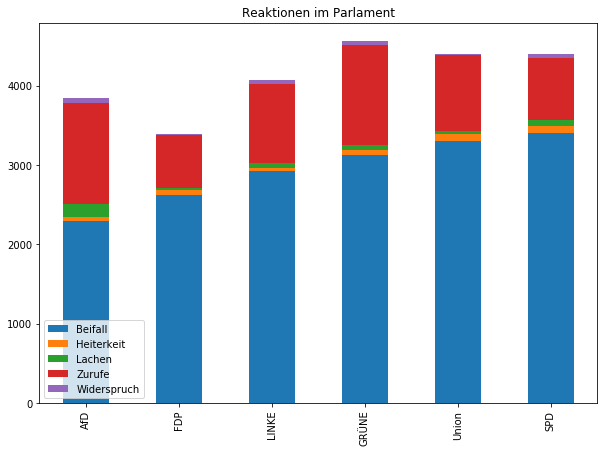

In [127]:
import numpy as np
import matplotlib.pyplot as plt

df_aktion.loc[:,['Beifall', 'Heiterkeit', 'Lachen', 'Zurufe', 'Widerspruch']].plot.bar(
    stacked=True, figsize=(10,7), title = 'Reaktionen im Parlament')

### Reaktion nach sprechender Partei (Fraktion)

In [128]:
# pd.pivot_table(df_comment_akt, index = 'SPD_Aktion2', aggfunc = np.count_nonzero )

aktionen_dic = {}


for partei_frak in parteien:
    frak_Lachen = []
    frak_Beifall = []
    frak_Heiterkeit = []
    frak_Zurufe = []
    frak_Widerspruch = []
    print(partei_frak)
    for partei_akt in parteien:
        frak_Lachen.append(df_comment_akt.loc[
                   (df_comment_akt['Fraktion'] == partei_frak) &
                   ((df_comment_akt[str(partei_akt)+'_Aktion1'] == 'Lachen')|
                   (df_comment_akt[str(partei_akt)+'_Aktion2'] == 'Lachen'))]['SPD_Aktion1'].count())

        frak_Beifall.append(df_comment_akt.loc[
                    (df_comment_akt['Fraktion'] == partei_frak) &
                    ((df_comment_akt[str(partei_akt)+'_Aktion1'] == 'Beifall')
                       |(df_comment_akt[str(partei_akt)+'_Aktion2'] == 'Beifall')
                       |(df_comment_akt[str(partei_akt)+'_Aktion1'] == 'Heiterkeit und Beifall')
                       |(df_comment_akt[str(partei_akt)+'_Aktion2'] == 'Heiterkeit und Beifall'))
                      ]['SPD_Aktion1'].count())
        
        frak_Heiterkeit.append(df_comment_akt.loc[
                    (df_comment_akt['Fraktion'] == partei_frak) &
                    ((df_comment_akt[str(partei_akt)+'_Aktion1'] == 'Heiterkeit')
                           |(df_comment_akt[str(partei_akt)+'_Aktion2'] == 'Heiterkeit')
                           |(df_comment_akt[str(partei_akt)+'_Aktion1'] == 'Heiterkeit und Beifall')
                           |(df_comment_akt[str(partei_akt)+'_Aktion2'] == 'Heiterkeit und Beifall'))
                          ]['SPD_Aktion1'].count())

        frak_Zurufe.append(df_comment_akt.loc[
                           (df_comment_akt['Fraktion'] == partei_frak) &
                           ((df_comment_akt[str(partei_akt)+'_Aktion1'] == 'Weitere Zurufe')|
                           (df_comment_akt[str(partei_akt)+'_Aktion2'] == 'Weitere Zurufe')|
                           (df_comment_akt[str(partei_akt)+'_Aktion1'] == 'Zuruf')|
                           (df_comment_akt[str(partei_akt)+'_Aktion2'] == 'Zuruf')|
                           (df_comment_akt[str(partei_akt)+'_Aktion1'] == 'Zurufe')|
                           (df_comment_akt[str(partei_akt)+'_Aktion2'] == 'Zurufe'))
                          ]['SPD_Aktion1'].count())

        frak_Widerspruch.append(df_comment_akt.loc[
                            (df_comment_akt['Fraktion'] == partei_frak) &
                            ((df_comment_akt[str(partei_akt)+'_Aktion1'] == 'Widerspruch')|
                            (df_comment_akt[str(partei_akt)+'_Aktion2'] == 'Widerspruch'))
                          ]['SPD_Aktion1'].count())
                                              
    aktionen_dic['reaktion_auf_'+str(partei_frak)] = pd.DataFrame(
        {'Beifall': frak_Beifall, 'Heiterkeit': frak_Heiterkeit, 'Lachen': frak_Lachen,
                         'Zurufe': frak_Zurufe, 'Widerspruch': frak_Widerspruch}, index=parteien)

SPD
FDP
AfD
CDU/CSU
BÜNDNIS_90/DIE_GRÜNEN
DIE_LINKE


#### Test/Überprüfen der Tabelle

In [ ]:
df.loc[(df['Fraktion'] == 'AfD') &
                    ((df['SPD_Aktion1'] == 'Beifall')
                       |(df['SPD_Aktion2'] == 'Beifall')
                       |(df['SPD_Aktion1'] == 'Heiterkeit und Beifall')
                       |(df['SPD_Aktion2'] == 'Heiterkeit und Beifall'))
                      ]

### Anzahl von Worten pro Fraktion (zur Relativierung der Ergebnisse)

In [129]:
## Rede wird von Fraktion gehalten -> "nach 2,5 Jahren hat SPD x Wörter gesprochen"
import numpy as np
df['count'] = df['Rede_Text'].str.findall(r'(\w+)').str.len()
word_count = pd.pivot_table(df, values='count', index = 'Fraktion', aggfunc = np.sum )

In [25]:
rel_aktionen_dic = {}
for partei_frak in parteien:
    rel_aktionen_dic['reaktion_auf_'+str(partei_frak)] = aktionen_dic['reaktion_auf_'+str(partei_frak)]/word_count['count'][partei_frak]

# Darstellung der Reaktionen nach Fraktionen - absolut und relativ

Text(0.5, 1, 'Beifall - relativ')

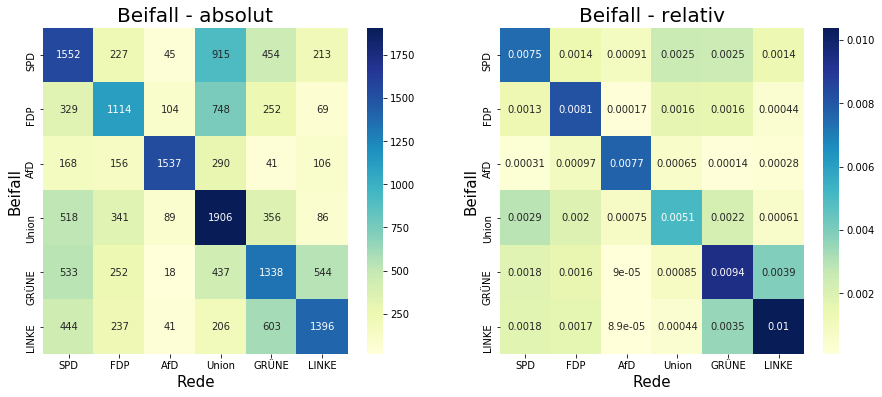

In [130]:
Parteien_kurz = ['SPD', 'FDP', 'AfD', 'Union', 'GRÜNE', 'LINKE']
aktion = 'Beifall'
Beifall_dic = {}
for partei in parteien:
    Beifall_dic[partei] = aktionen_dic['reaktion_auf_' + partei][aktion]
Beifall_df = pd.concat(Beifall_dic, axis=1)    
Beifall_df.columns = Parteien_kurz # Partei die eine Rede hält (Fraktion)
Beifall_df.index = Parteien_kurz # Partei die Beifall spendet (Partei)

rel_Beifall_dic = {}
for partei in parteien:
    rel_Beifall_dic[partei] = rel_aktionen_dic['reaktion_auf_' + partei][aktion]
rel_Beifall_df = pd.concat(rel_Beifall_dic, axis=1)    
rel_Beifall_df.columns = Parteien_kurz # Partei die eine Rede hält (Fraktion)
rel_Beifall_df.index = Parteien_kurz # Partei die Beifall spendet (Partei)


import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15, 6))

ax = fig.add_subplot(1,2,1)

ax = sns.heatmap(Beifall_df, annot=True, fmt="d", cmap="YlGnBu")
ax.set_ylabel(aktion, fontsize = 15)
ax.set_xlabel('Rede', fontsize = 15)
ax.set_title(aktion+' - absolut', size = 20)

ax = fig.add_subplot(1,2,2)

ax = sns.heatmap(rel_Beifall_df, annot=True, cmap="YlGnBu")
ax.set_ylabel(aktion, fontsize = 15)
ax.set_xlabel('Rede', fontsize = 15)
ax.set_title(aktion+' - relativ', size = 20)

## Beifall als Reaktion

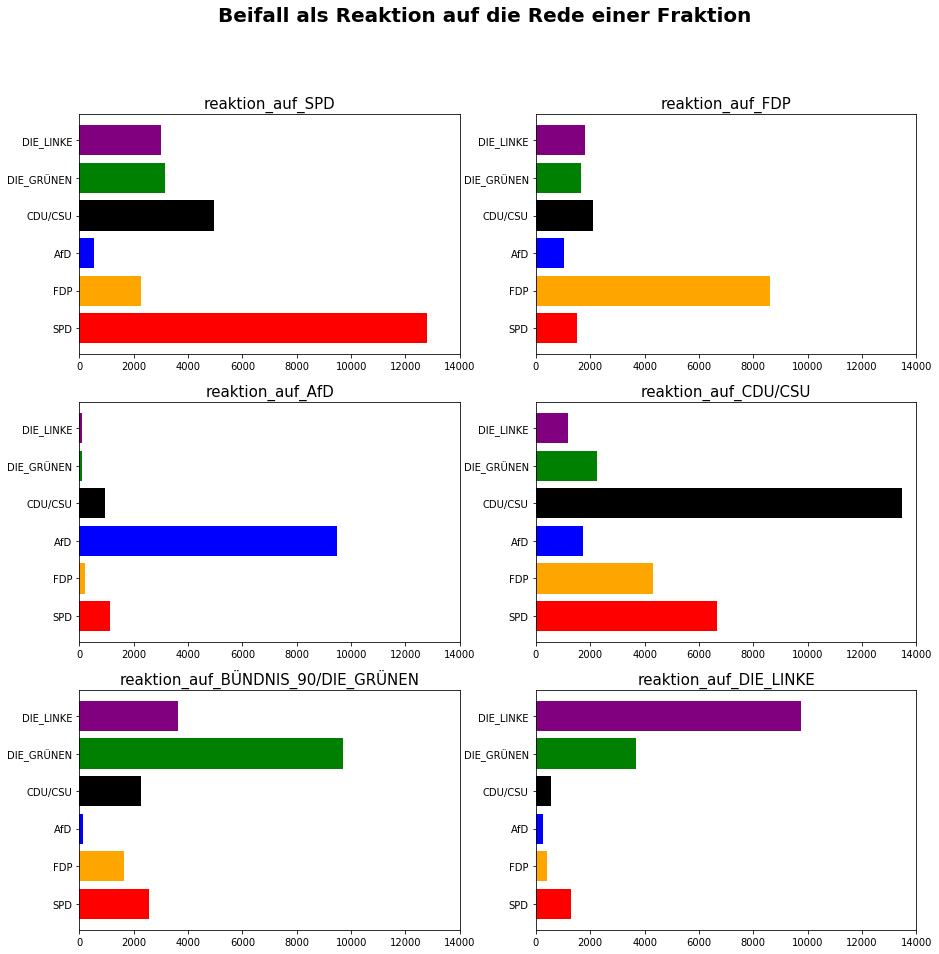

In [21]:
# aktionen_dic['reation_auf_AfD']
# aktionen_dic['reation_auf_AfD']['Beifall']['SPD']

import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (15, 15))
fig.tight_layout()
fig.suptitle('Beifall als Reaktion auf die Rede einer Fraktion', fontsize = 20, weight = 'bold')

for fraktion, n in zip(aktionen_dic, range(1, 7)):
    
    ax = fig.add_subplot(3,2,n)
    ax.set_title(str(fraktion), fontsize = 15)
    ax.set_yticklabels(['SPD', 'FDP', 'AfD', 'CDU/CSU', 'DIE_GRÜNEN', 'DIE_LINKE'])
    ax.set_xlim(0, 14000)
                       
    for partei in aktionen_dic[fraktion].index:
        if partei == 'AfD':
             ax = plt.barh(partei, aktionen_dic[fraktion]['Beifall'][partei], color = 'blue')
        elif partei == 'FDP':
             ax = plt.barh(partei, aktionen_dic[fraktion]['Beifall'][partei], color = 'orange')
        elif partei == 'DIE_LINKE':
             ax = plt.barh(partei, aktionen_dic[fraktion]['Beifall'][partei], color = 'purple')        
        elif partei == 'BÜNDNIS_90/DIE_GRÜNEN':
             ax = plt.barh(partei, aktionen_dic[fraktion]['Beifall'][partei], color = 'green')       
        elif partei == 'CDU/CSU':
             ax = plt.barh(partei, aktionen_dic[fraktion]['Beifall'][partei], color = 'black')              
        else:
             ax = plt.barh(partei, aktionen_dic[fraktion]['Beifall'][partei], color = 'red')
        

#### Relative Reaktion

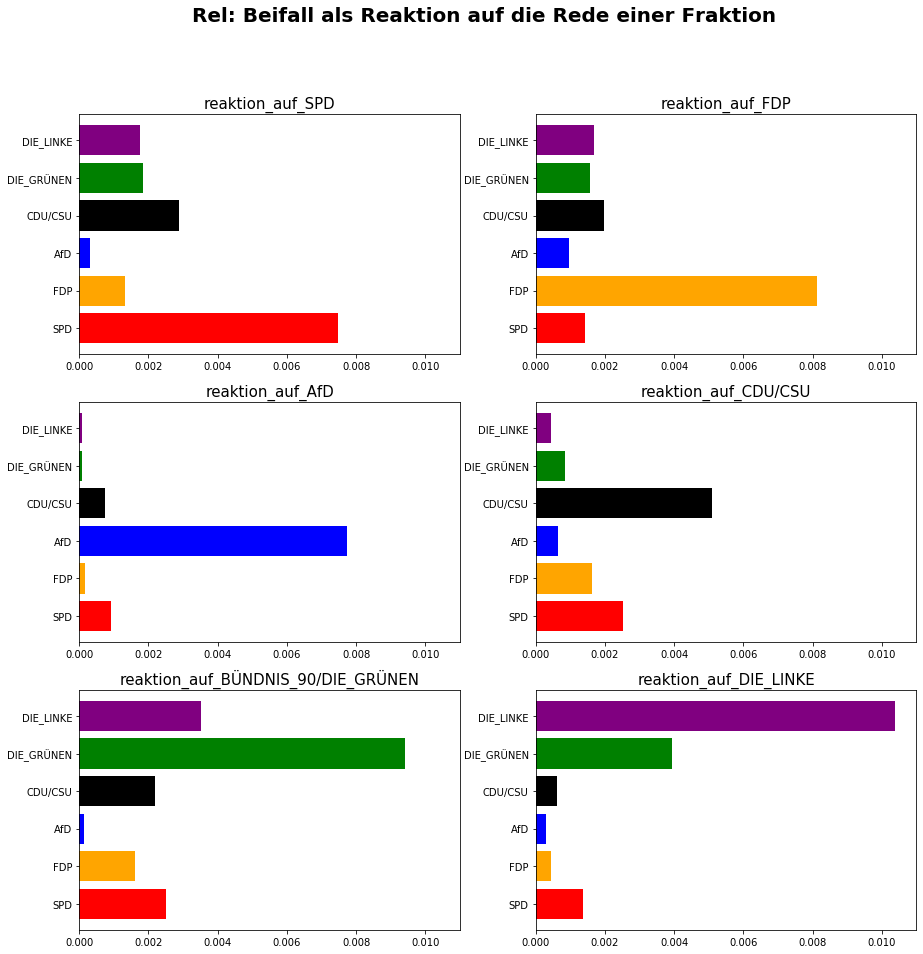

In [81]:
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (15, 15))
fig.tight_layout()
fig.suptitle('Rel: Beifall als Reaktion auf die Rede einer Fraktion', fontsize = 20, weight = 'bold')

for fraktion, n in zip(rel_aktionen_dic, range(1, 7)):
    
    ax = fig.add_subplot(3,2,n)
    ax.set_title(str(fraktion), fontsize = 15)
    ax.set_yticklabels(['SPD', 'FDP', 'AfD', 'CDU/CSU', 'DIE_GRÜNEN', 'DIE_LINKE'])
    ax.set_xlim(0, 0.011)
                       
    for partei in rel_aktionen_dic[fraktion].index:
        if partei == 'AfD':
             ax = plt.barh(partei, rel_aktionen_dic[fraktion]['Beifall'][partei], color = 'blue')
        elif partei == 'FDP':
             ax = plt.barh(partei, rel_aktionen_dic[fraktion]['Beifall'][partei], color = 'orange')
        elif partei == 'DIE_LINKE':
             ax = plt.barh(partei, rel_aktionen_dic[fraktion]['Beifall'][partei], color = 'purple')        
        elif partei == 'BÜNDNIS_90/DIE_GRÜNEN':
             ax = plt.barh(partei, rel_aktionen_dic[fraktion]['Beifall'][partei], color = 'green')       
        elif partei == 'CDU/CSU':
             ax = plt.barh(partei, rel_aktionen_dic[fraktion]['Beifall'][partei], color = 'black')              
        else:
             ax = plt.barh(partei, rel_aktionen_dic[fraktion]['Beifall'][partei], color = 'red')
        

## Zurufe als Reaktion

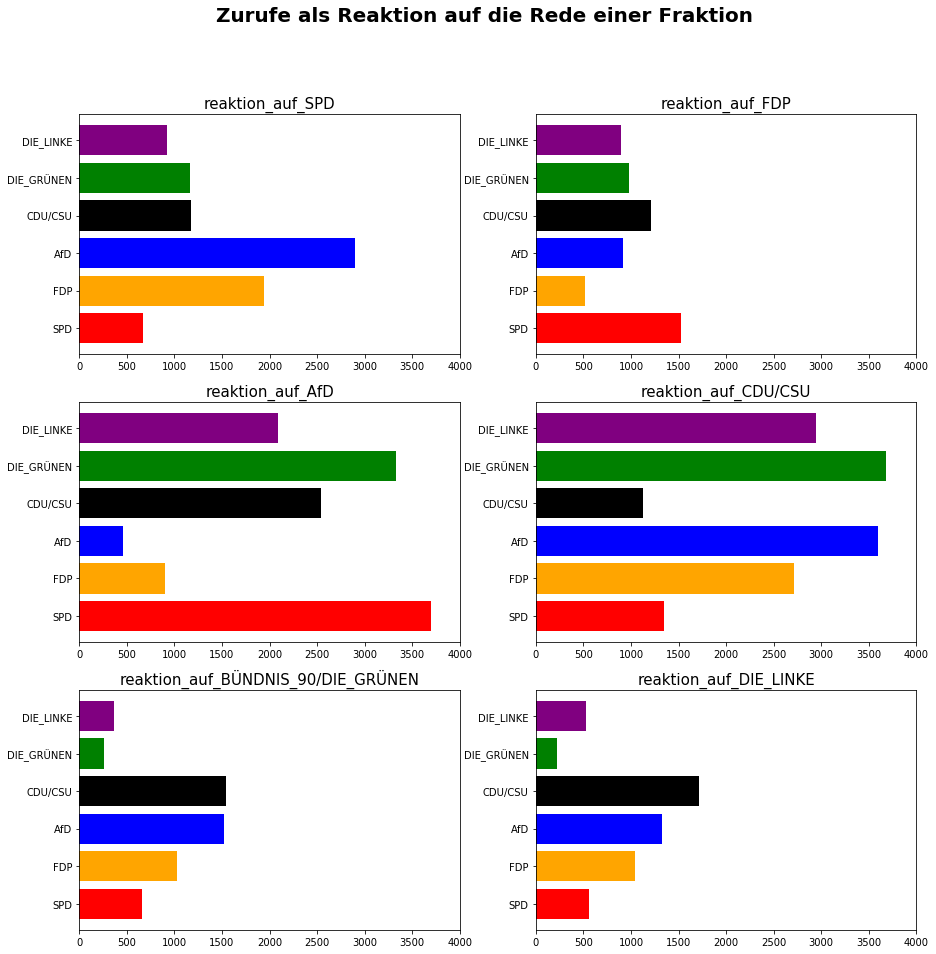

In [82]:
fig = plt.figure(figsize = (15, 15))
fig.tight_layout()
fig.suptitle('Zurufe als Reaktion auf die Rede einer Fraktion', fontsize = 20, weight = 'bold')

for fraktion, n in zip(aktionen_dic, range(1, 7)):
    
    ax = fig.add_subplot(3,2,n)
    ax.set_title(str(fraktion), fontsize = 15)
    ax.set_yticklabels(['SPD', 'FDP', 'AfD', 'CDU/CSU', 'DIE_GRÜNEN', 'DIE_LINKE'])
    ax.set_xlim(0, 4000)
                       
    for partei in aktionen_dic[fraktion].index:
        if partei == 'AfD':
             ax = plt.barh(partei, aktionen_dic[fraktion]['Zurufe'][partei], color = 'blue')
        elif partei == 'FDP':
             ax = plt.barh(partei, aktionen_dic[fraktion]['Zurufe'][partei], color = 'orange')
        elif partei == 'DIE_LINKE':
             ax = plt.barh(partei, aktionen_dic[fraktion]['Zurufe'][partei], color = 'purple')        
        elif partei == 'BÜNDNIS_90/DIE_GRÜNEN':
             ax = plt.barh(partei, aktionen_dic[fraktion]['Zurufe'][partei], color = 'green')       
        elif partei == 'CDU/CSU':
             ax = plt.barh(partei, aktionen_dic[fraktion]['Zurufe'][partei], color = 'black')              
        else:
             ax = plt.barh(partei, aktionen_dic[fraktion]['Zurufe'][partei], color = 'red')

#### Relative Reaktion

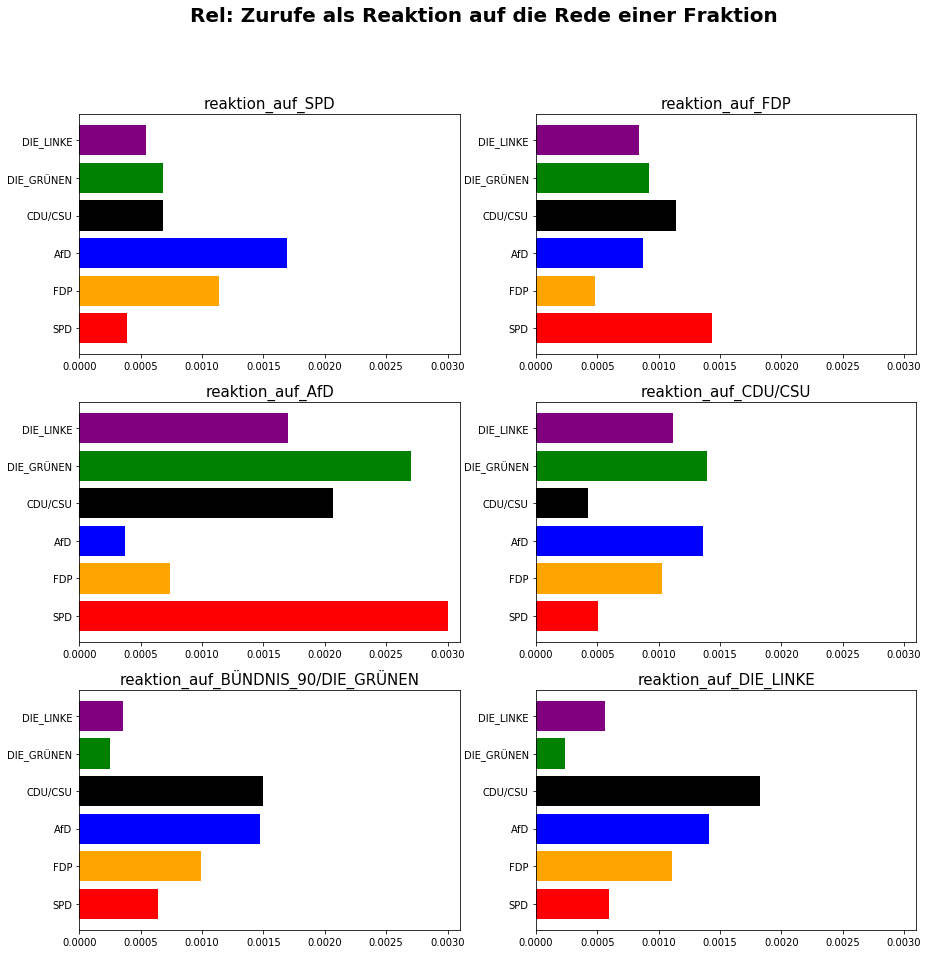

In [83]:
fig = plt.figure(figsize = (15, 15))
fig.tight_layout()
fig.suptitle('Rel: Zurufe als Reaktion auf die Rede einer Fraktion', fontsize = 20, weight = 'bold')

for fraktion, n in zip(rel_aktionen_dic, range(1, 7)):
    
    ax = fig.add_subplot(3,2,n)
    ax.set_title(str(fraktion), fontsize = 15)
    ax.set_yticklabels(['SPD', 'FDP', 'AfD', 'CDU/CSU', 'DIE_GRÜNEN', 'DIE_LINKE'])
    ax.set_xlim(0, 0.0031)
                       
    for partei in rel_aktionen_dic[fraktion].index:
        if partei == 'AfD':
             ax = plt.barh(partei, rel_aktionen_dic[fraktion]['Zurufe'][partei], color = 'blue')
        elif partei == 'FDP':
             ax = plt.barh(partei, rel_aktionen_dic[fraktion]['Zurufe'][partei], color = 'orange')
        elif partei == 'DIE_LINKE':
             ax = plt.barh(partei, rel_aktionen_dic[fraktion]['Zurufe'][partei], color = 'purple')        
        elif partei == 'BÜNDNIS_90/DIE_GRÜNEN':
             ax = plt.barh(partei, rel_aktionen_dic[fraktion]['Zurufe'][partei], color = 'green')       
        elif partei == 'CDU/CSU':
             ax = plt.barh(partei, rel_aktionen_dic[fraktion]['Zurufe'][partei], color = 'black')              
        else:
             ax = plt.barh(partei, rel_aktionen_dic[fraktion]['Zurufe'][partei], color = 'red')

## Lachen (oder Heiterkeit) als Reaktion

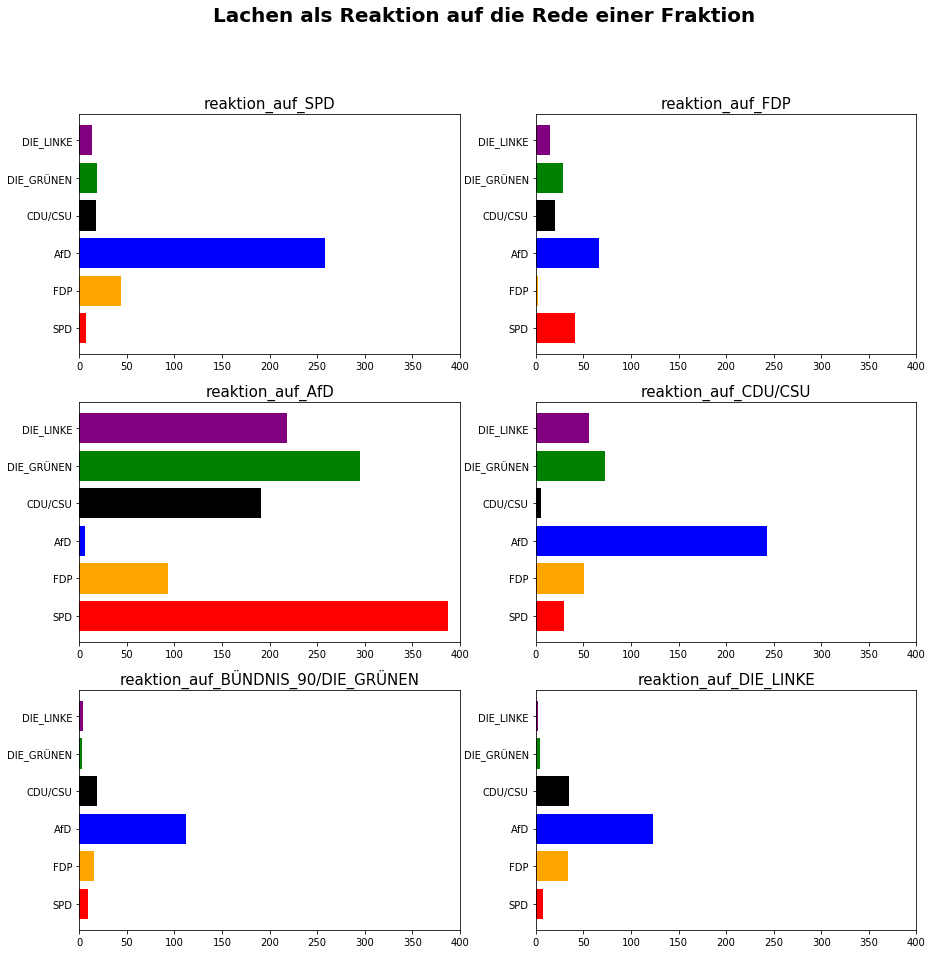

In [84]:
fig = plt.figure(figsize = (15, 15))
fig.tight_layout()
reaktion = 'Lachen' # Heiterkeit oder Lachen (evtl. Widerspruch) bieten sich bei dieser Skala an
fig.suptitle(reaktion+' als Reaktion auf die Rede einer Fraktion', fontsize = 20, weight = 'bold')

for fraktion, n in zip(aktionen_dic, range(1, 7)):
    
    ax = fig.add_subplot(3,2,n)
    ax.set_title(str(fraktion), fontsize = 15)
    ax.set_yticklabels(['SPD', 'FDP', 'AfD', 'CDU/CSU', 'DIE_GRÜNEN', 'DIE_LINKE'])
    ax.set_xlim(0, 400)
                       
    for partei in aktionen_dic[fraktion].index:
        if partei == 'AfD':
             ax = plt.barh(partei, aktionen_dic[fraktion][reaktion][partei], color = 'blue')
        elif partei == 'FDP':
             ax = plt.barh(partei, aktionen_dic[fraktion][reaktion][partei], color = 'orange')
        elif partei == 'DIE_LINKE':
             ax = plt.barh(partei, aktionen_dic[fraktion][reaktion][partei], color = 'purple')        
        elif partei == 'BÜNDNIS_90/DIE_GRÜNEN':
             ax = plt.barh(partei, aktionen_dic[fraktion][reaktion][partei], color = 'green')       
        elif partei == 'CDU/CSU':
             ax = plt.barh(partei, aktionen_dic[fraktion][reaktion][partei], color = 'black')              
        else:
             ax = plt.barh(partei, aktionen_dic[fraktion][reaktion][partei], color = 'red')

#### Relative Reaktion

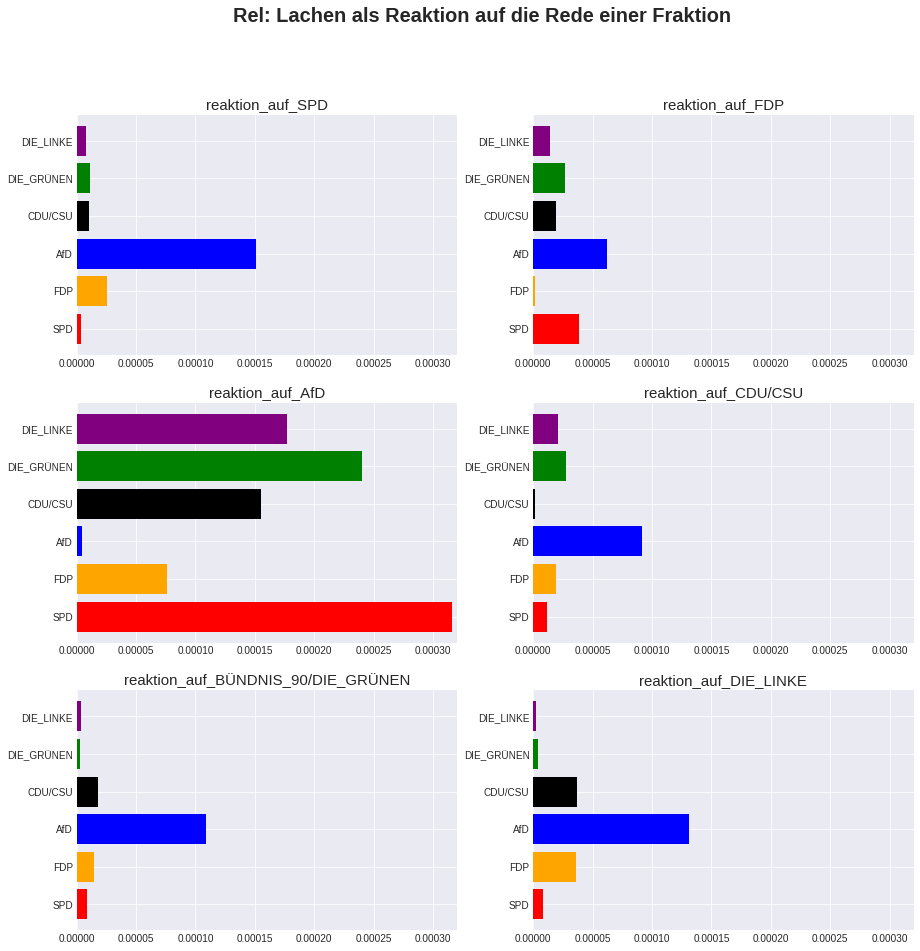

In [336]:
fig = plt.figure(figsize = (15, 15))
fig.tight_layout()
reaktion = 'Lachen' # Heiterkeit oder Lachen (evtl. Widerspruch) bieten sich bei dieser Skala an
fig.suptitle('Rel: '+reaktion+' als Reaktion auf die Rede einer Fraktion', fontsize = 20, weight = 'bold')

for fraktion, n in zip(rel_aktionen_dic, range(1, 7)):
    
    ax = fig.add_subplot(3,2,n)
    ax.set_title(str(fraktion), fontsize = 15)
    ax.set_yticklabels(['SPD', 'FDP', 'AfD', 'CDU/CSU', 'DIE_GRÜNEN', 'DIE_LINKE'])
    
    ax.set_xlim(0, 0.00032)
                       
    for partei in rel_aktionen_dic[fraktion].index:
        if partei == 'AfD':
             ax = plt.barh(partei, rel_aktionen_dic[fraktion][reaktion][partei], color = 'blue')
        elif partei == 'FDP':
             ax = plt.barh(partei, rel_aktionen_dic[fraktion][reaktion][partei], color = 'orange')
        elif partei == 'DIE_LINKE':
             ax = plt.barh(partei, rel_aktionen_dic[fraktion][reaktion][partei], color = 'purple')        
        elif partei == 'BÜNDNIS_90/DIE_GRÜNEN':
             ax = plt.barh(partei, rel_aktionen_dic[fraktion][reaktion][partei], color = 'green')       
        elif partei == 'CDU/CSU':
             ax = plt.barh(partei, rel_aktionen_dic[fraktion][reaktion][partei], color = 'black')              
        else:
             ax = plt.barh(partei, rel_aktionen_dic[fraktion][reaktion][partei], color = 'red')

## Wenn eine Partei spricht wie oft applaudiert die ganze bzw teile der eigenen Fraktion
# Problem im Datensatz!
Beispiel: Beifall bei der SPD sowie bei Abgeordneten der FDP und der DIE_LINKE
In diesem Fall würde DIE_LINKE als "ganze" zugeordnet!
Wenn dieser Teil korrekt sein soll, muss zunächst Datensatz erneut (korrekt) ausgelesen werden!

#### Berechne teil/ganz Reaktion wenn Rede der eigenen Fraktion - voller Datensatz

In [24]:
df = df_comp # Vergleich mit SZ Zeitraum

In [7]:
# pd.pivot_table(df, index = 'SPD_Aktion2', aggfunc = np.count_nonzero )

teile_ganze_akt_dic = {}

ganz_frak_Lachen = []
teil_frak_Lachen = []
ganz_frak_Beifall = []
teil_frak_Beifall = []
ganz_frak_Heiterkeit = []
teil_frak_Heiterkeit = []
ganz_frak_Zurufe = []
teil_frak_Zurufe = []
ganz_frak_Widerspruch = []
teil_frak_Widerspruch = []

for partei_frak in parteien:
    print(partei_frak)
    ganz_frak_Lachen.append(df.loc[
               (df['Fraktion'] == partei_frak) &
               ((df[str(partei_frak)+'_Akteur1'] == 'ganze')
                |(df[str(partei_frak)+'_Akteur2'] == 'ganze')) &
                  ((df[str(partei_frak)+'_Aktion1'] == 'Lachen')
                  |(df[str(partei_frak)+'_Aktion2'] == 'Lachen'))
               ]['SPD_Aktion1'].count())

    teil_frak_Lachen.append(df.loc[
               (df['Fraktion'] == partei_frak) &
               ((df[str(partei_frak)+'_Akteur1'] == 'teile')
                |(df[str(partei_frak)+'_Akteur2'] == 'teile')) &
                  ((df[str(partei_frak)+'_Aktion1'] == 'Lachen')
                  |(df[str(partei_frak)+'_Aktion2'] == 'Lachen'))
               ]['SPD_Aktion1'].count())

    ganz_frak_Beifall.append(df.loc[
               (df['Fraktion'] == partei_frak) &
               ((df[str(partei_frak)+'_Akteur1'] == 'ganze')
                |(df[str(partei_frak)+'_Akteur2'] == 'ganze')) &
                   ((df[str(partei_frak)+'_Aktion1'] == 'Beifall')
                   |(df[str(partei_frak)+'_Aktion2'] == 'Beifall')
                   |(df[str(partei_frak)+'_Aktion1'] == 'Heiterkeit und Beifall')
                   |(df[str(partei_frak)+'_Aktion2'] == 'Heiterkeit und Beifall'))
                  ]['SPD_Aktion1'].count())

    teil_frak_Beifall.append(df.loc[
               (df['Fraktion'] == partei_frak) &
               ((df[str(partei_frak)+'_Akteur1'] == 'teile')
                |(df[str(partei_frak)+'_Akteur2'] == 'teile')) &
                   ((df[str(partei_frak)+'_Aktion1'] == 'Beifall')
                   |(df[str(partei_frak)+'_Aktion2'] == 'Beifall')
                   |(df[str(partei_frak)+'_Aktion1'] == 'Heiterkeit und Beifall')
                   |(df[str(partei_frak)+'_Aktion2'] == 'Heiterkeit und Beifall'))
                  ]['SPD_Aktion1'].count())

    ganz_frak_Heiterkeit.append(df.loc[
               (df['Fraktion'] == partei_frak) &
               ((df[str(partei_frak)+'_Akteur1'] == 'ganze')
                |(df[str(partei_frak)+'_Akteur2'] == 'ganze')) &
                       ((df[str(partei_frak)+'_Aktion1'] == 'Heiterkeit')
                       |(df[str(partei_frak)+'_Aktion2'] == 'Heiterkeit')
                       |(df[str(partei_frak)+'_Aktion1'] == 'Heiterkeit und Beifall')
                       |(df[str(partei_frak)+'_Aktion2'] == 'Heiterkeit und Beifall'))
                      ]['SPD_Aktion1'].count())

    teil_frak_Heiterkeit.append(df.loc[
               (df['Fraktion'] == partei_frak) &
               ((df[str(partei_frak)+'_Akteur1'] == 'teile')
                |(df[str(partei_frak)+'_Akteur2'] == 'teile')) &
                       ((df[str(partei_frak)+'_Aktion1'] == 'Heiterkeit')
                       |(df[str(partei_frak)+'_Aktion2'] == 'Heiterkeit')
                       |(df[str(partei_frak)+'_Aktion1'] == 'Heiterkeit und Beifall')
                       |(df[str(partei_frak)+'_Aktion2'] == 'Heiterkeit und Beifall'))
                      ]['SPD_Aktion1'].count())

    ganz_frak_Zurufe.append(df.loc[
               (df['Fraktion'] == partei_frak) &
               ((df[str(partei_frak)+'_Akteur1'] == 'ganze')
                |(df[str(partei_frak)+'_Akteur2'] == 'ganze')) &
                       ((df[str(partei_frak)+'_Aktion1'] == 'Weitere Zurufe')|
                       (df[str(partei_frak)+'_Aktion2'] == 'Weitere Zurufe')|
                       (df[str(partei_frak)+'_Aktion1'] == 'Zuruf')|
                       (df[str(partei_frak)+'_Aktion2'] == 'Zuruf')|
                       (df[str(partei_frak)+'_Aktion1'] == 'Zurufe')|
                       (df[str(partei_frak)+'_Aktion2'] == 'Zurufe'))
                      ]['SPD_Aktion1'].count())

    teil_frak_Zurufe.append(df.loc[
               (df['Fraktion'] == partei_frak) &
               ((df[str(partei_frak)+'_Akteur1'] == 'teile')
                |(df[str(partei_frak)+'_Akteur2'] == 'teile')) &
                       ((df[str(partei_frak)+'_Aktion1'] == 'Weitere Zurufe')|
                       (df[str(partei_frak)+'_Aktion2'] == 'Weitere Zurufe')|
                       (df[str(partei_frak)+'_Aktion1'] == 'Zuruf')|
                       (df[str(partei_frak)+'_Aktion2'] == 'Zuruf')|
                       (df[str(partei_frak)+'_Aktion1'] == 'Zurufe')|
                       (df[str(partei_frak)+'_Aktion2'] == 'Zurufe'))
                      ]['SPD_Aktion1'].count())

    ganz_frak_Widerspruch.append(df.loc[
               (df['Fraktion'] == partei_frak) &
               ((df[str(partei_frak)+'_Akteur1'] == 'ganze')
                |(df[str(partei_frak)+'_Akteur2'] == 'ganze')) &
                        ((df[str(partei_frak)+'_Aktion1'] == 'Widerspruch')|
                        (df[str(partei_frak)+'_Aktion2'] == 'Widerspruch'))
                      ]['SPD_Aktion1'].count())

    teil_frak_Widerspruch.append(df.loc[
               (df['Fraktion'] == partei_frak) &
               ((df[str(partei_frak)+'_Akteur1'] == 'teile')
                |(df[str(partei_frak)+'_Akteur2'] == 'teile')) &
                        ((df[str(partei_frak)+'_Aktion1'] == 'Widerspruch')|
                        (df[str(partei_frak)+'_Aktion2'] == 'Widerspruch'))
                      ]['SPD_Aktion1'].count())
                                              
eigenePart_teil_ganz_reaktion = pd.DataFrame(
        {'Beifall_ganz': ganz_frak_Beifall, 'Beifall_teil': teil_frak_Beifall, 
         'Heiterkeit_ganz': ganz_frak_Heiterkeit, 'Heiterkeit_teil': teil_frak_Heiterkeit, 
         'Lachen_ganz': ganz_frak_Lachen, 'Lachen_teil': teil_frak_Lachen,
         'Zurufe_ganz': ganz_frak_Zurufe, 'Zurufe_teil': teil_frak_Zurufe,
         'Widerspruch_ganz': ganz_frak_Widerspruch, 'Widerspruch_teil': teil_frak_Widerspruch}, index=parteien)

SPD
FDP
AfD
CDU/CSU
BÜNDNIS_90/DIE_GRÜNEN
DIE_LINKE


#### Berechne teil/ganz Reaktion wenn Rede einer anderen Fraktion - voller Datensatz

In [12]:
# pd.pivot_table(df, index = 'SPD_Aktion2', aggfunc = np.count_nonzero )

teile_ganze_akt_dic = {}

ganz_frak_Lachen = []
teil_frak_Lachen = []
ganz_frak_Beifall = []
teil_frak_Beifall = []
ganz_frak_Heiterkeit = []
teil_frak_Heiterkeit = []
ganz_frak_Zurufe = []
teil_frak_Zurufe = []
ganz_frak_Widerspruch = []
teil_frak_Widerspruch = []

for partei_frak in parteien:
    print(partei_frak)
    ganz_frak_Lachen.append(df.loc[
               (df['Fraktion'] != partei_frak) &
               ((df[str(partei_frak)+'_Akteur1'] == 'ganze')
                |(df[str(partei_frak)+'_Akteur2'] == 'ganze')) &
                  ((df[str(partei_frak)+'_Aktion1'] == 'Lachen')
                  |(df[str(partei_frak)+'_Aktion2'] == 'Lachen'))
               ]['SPD_Aktion1'].count())

    teil_frak_Lachen.append(df.loc[
               (df['Fraktion'] != partei_frak) &
               ((df[str(partei_frak)+'_Akteur1'] == 'teile')
                |(df[str(partei_frak)+'_Akteur2'] == 'teile')) &
                  ((df[str(partei_frak)+'_Aktion1'] == 'Lachen')
                  |(df[str(partei_frak)+'_Aktion2'] == 'Lachen'))
               ]['SPD_Aktion1'].count())

    ganz_frak_Beifall.append(df.loc[
               (df['Fraktion'] != partei_frak) &
               ((df[str(partei_frak)+'_Akteur1'] == 'ganze')
                |(df[str(partei_frak)+'_Akteur2'] == 'ganze')) &
                   ((df[str(partei_frak)+'_Aktion1'] == 'Beifall')
                   |(df[str(partei_frak)+'_Aktion2'] == 'Beifall')
                   |(df[str(partei_frak)+'_Aktion1'] == 'Heiterkeit und Beifall')
                   |(df[str(partei_frak)+'_Aktion2'] == 'Heiterkeit und Beifall'))
                  ]['SPD_Aktion1'].count())

    teil_frak_Beifall.append(df.loc[
               (df['Fraktion'] != partei_frak) &
               ((df[str(partei_frak)+'_Akteur1'] == 'teile')
                |(df[str(partei_frak)+'_Akteur2'] == 'teile')) &
                   ((df[str(partei_frak)+'_Aktion1'] == 'Beifall')
                   |(df[str(partei_frak)+'_Aktion2'] == 'Beifall')
                   |(df[str(partei_frak)+'_Aktion1'] == 'Heiterkeit und Beifall')
                   |(df[str(partei_frak)+'_Aktion2'] == 'Heiterkeit und Beifall'))
                  ]['SPD_Aktion1'].count())

    ganz_frak_Heiterkeit.append(df.loc[
               (df['Fraktion'] != partei_frak) &
               ((df[str(partei_frak)+'_Akteur1'] == 'ganze')
                |(df[str(partei_frak)+'_Akteur2'] == 'ganze')) &
                       ((df[str(partei_frak)+'_Aktion1'] == 'Heiterkeit')
                       |(df[str(partei_frak)+'_Aktion2'] == 'Heiterkeit')
                       |(df[str(partei_frak)+'_Aktion1'] == 'Heiterkeit und Beifall')
                       |(df[str(partei_frak)+'_Aktion2'] == 'Heiterkeit und Beifall'))
                      ]['SPD_Aktion1'].count())

    teil_frak_Heiterkeit.append(df.loc[
               (df['Fraktion'] != partei_frak) &
               ((df[str(partei_frak)+'_Akteur1'] == 'teile')
                |(df[str(partei_frak)+'_Akteur2'] == 'teile')) &
                       ((df[str(partei_frak)+'_Aktion1'] == 'Heiterkeit')
                       |(df[str(partei_frak)+'_Aktion2'] == 'Heiterkeit')
                       |(df[str(partei_frak)+'_Aktion1'] == 'Heiterkeit und Beifall')
                       |(df[str(partei_frak)+'_Aktion2'] == 'Heiterkeit und Beifall'))
                      ]['SPD_Aktion1'].count())

    ganz_frak_Zurufe.append(df.loc[
               (df['Fraktion'] != partei_frak) &
               ((df[str(partei_frak)+'_Akteur1'] == 'ganze')
                |(df[str(partei_frak)+'_Akteur2'] == 'ganze')) &
                       ((df[str(partei_frak)+'_Aktion1'] == 'Weitere Zurufe')|
                       (df[str(partei_frak)+'_Aktion2'] == 'Weitere Zurufe')|
                       (df[str(partei_frak)+'_Aktion1'] == 'Zuruf')|
                       (df[str(partei_frak)+'_Aktion2'] == 'Zuruf')|
                       (df[str(partei_frak)+'_Aktion1'] == 'Zurufe')|
                       (df[str(partei_frak)+'_Aktion2'] == 'Zurufe'))
                      ]['SPD_Aktion1'].count())

    teil_frak_Zurufe.append(df.loc[
               (df['Fraktion'] != partei_frak) &
               ((df[str(partei_frak)+'_Akteur1'] == 'teile')
                |(df[str(partei_frak)+'_Akteur2'] == 'teile')) &
                       ((df[str(partei_frak)+'_Aktion1'] == 'Weitere Zurufe')|
                       (df[str(partei_frak)+'_Aktion2'] == 'Weitere Zurufe')|
                       (df[str(partei_frak)+'_Aktion1'] == 'Zuruf')|
                       (df[str(partei_frak)+'_Aktion2'] == 'Zuruf')|
                       (df[str(partei_frak)+'_Aktion1'] == 'Zurufe')|
                       (df[str(partei_frak)+'_Aktion2'] == 'Zurufe'))
                      ]['SPD_Aktion1'].count())

    ganz_frak_Widerspruch.append(df.loc[
               (df['Fraktion'] != partei_frak) &
               ((df[str(partei_frak)+'_Akteur1'] == 'ganze')
                |(df[str(partei_frak)+'_Akteur2'] == 'ganze')) &
                        ((df[str(partei_frak)+'_Aktion1'] == 'Widerspruch')|
                        (df[str(partei_frak)+'_Aktion2'] == 'Widerspruch'))
                      ]['SPD_Aktion1'].count())

    teil_frak_Widerspruch.append(df.loc[
               (df['Fraktion'] != partei_frak) &
               ((df[str(partei_frak)+'_Akteur1'] == 'teile')
                |(df[str(partei_frak)+'_Akteur2'] == 'teile')) &
                        ((df[str(partei_frak)+'_Aktion1'] == 'Widerspruch')|
                        (df[str(partei_frak)+'_Aktion2'] == 'Widerspruch'))
                      ]['SPD_Aktion1'].count())
                                              
anderePart_teil_ganz_reaktion = pd.DataFrame(
        {'Beifall_ganz': ganz_frak_Beifall, 'Beifall_teil': teil_frak_Beifall, 
         'Heiterkeit_ganz': ganz_frak_Heiterkeit, 'Heiterkeit_teil': teil_frak_Heiterkeit, 
         'Lachen_ganz': ganz_frak_Lachen, 'Lachen_teil': teil_frak_Lachen,
         'Zurufe_ganz': ganz_frak_Zurufe, 'Zurufe_teil': teil_frak_Zurufe,
         'Widerspruch_ganz': ganz_frak_Widerspruch, 'Widerspruch_teil': teil_frak_Widerspruch}, index=parteien)

SPD
FDP
AfD
CDU/CSU
BÜNDNIS_90/DIE_GRÜNEN
DIE_LINKE


In [23]:
pd.set_option('display.max_colwidth',None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df.loc[
               (df['Fraktion'] != partei_frak) &
               ((df[str(partei_frak)+'_Akteur1'] == 'ganze')
                |(df[str(partei_frak)+'_Akteur2'] == 'ganze')) &
                   ((df[str(partei_frak)+'_Aktion1'] == 'Beifall')
                   |(df[str(partei_frak)+'_Aktion2'] == 'Beifall')
                   |(df[str(partei_frak)+'_Aktion1'] == 'Heiterkeit und Beifall')
                   |(df[str(partei_frak)+'_Aktion2'] == 'Heiterkeit und Beifall'))
                  ][['Kommentar','SPD_Akteur1','SPD_Aktion1','SPD_Text1','SPD_Akteur2',
                     'SPD_Aktion2','SPD_Text2','FDP_Akteur1','FDP_Aktion1','FDP_Text1',
                     'FDP_Akteur2','FDP_Aktion2','FDP_Text2','AfD_Akteur1','AfD_Aktion1',
                     'AfD_Text1','AfD_Akteur2','AfD_Aktion2','AfD_Text2','CDU/CSU_Akteur1',
                     'CDU/CSU_Aktion1','CDU/CSU_Text1','CDU/CSU_Akteur2','CDU/CSU_Aktion2',
                     'CDU/CSU_Text2','BÜNDNIS_90/DIE_GRÜNEN_Akteur1','BÜNDNIS_90/DIE_GRÜNEN_Aktion1',
                     'BÜNDNIS_90/DIE_GRÜNEN_Text1','BÜNDNIS_90/DIE_GRÜNEN_Akteur2',
                     'BÜNDNIS_90/DIE_GRÜNEN_Aktion2','BÜNDNIS_90/DIE_GRÜNEN_Text2',
                     'DIE_LINKE_Akteur1','DIE_LINKE_Aktion1','DIE_LINKE_Text1','DIE_LINKE_Akteur2',
                     'DIE_LINKE_Aktion2','DIE_LINKE_Text2']]



Kommentar  \
15                                                                                                                                                                                                                                                                                                                                                                                Beifall bei der SPD sowie bei Abgeordneten der FDP und der DIE_LINKE   
23                                                                                                                                                                                                                                                                                                                                                                                Beifall bei der SPD sowie bei Abgeordneten der AfD und der DIE_LINKE   
24                                                                                                                                                                                                                                                                                                                                                                                Beifall bei der SPD sowie bei Abgeordneten der AfD und der DIE_LINKE   
48                                                                                                                                                                                                                                                                                                                                                                                                                           Beifall bei der DIE_LINKE   
89                                                                                                                                                                                                                                                                                                                                                              Beifall bei der FDP, der CDU/CSU, der SPD, der DIE_LINKE und dem BÜNDNIS_90/DIE_GRÜNEN   
100                                                                                                                                                                                                                                                                                                                                                                Beifall beim BÜNDNIS_90/DIE_GRÜNEN sowie bei Abgeordneten der SPD und der DIE_LINKE   
137                                                                                                                                                                                                                                                                                                                              Beifall bei der CDU/CSU, der SPD, der FDP, der DIE_LINKE und dem BÜNDNIS_90/DIE_GRÜNEN sowie bei Abgeordneten der AfD   
220                                                                                                                                                                                                                                                                                                                                                                                                              Beifall bei der SPD und der DIE_LINKE   
237                                                                                                                                                                                                                                                                                                                                                                                                                          Beifall bei der DIE_LINKE   
316      

In [144]:
#########Voller Datensatz#############

#pickle.dump(eigenePart_teil_ganz_reaktion, open(PICKLE_FOLDER_PATH + 'eigenePart_teil_ganz_reaktion.p', "wb" ))
eigenePart_teil_ganz_reaktion = pickle.load(open(PICKLE_FOLDER_PATH + 'eigenePart_teil_ganz_reaktion.p', "rb" ))
#pickle.dump(anderePart_teil_ganz_reaktion, open(PICKLE_FOLDER_PATH + 'anderePart_teil_ganz_reaktion.p', "wb" ))
anderePart_teil_ganz_reaktion = pickle.load(open(PICKLE_FOLDER_PATH + 'anderePart_teil_ganz_reaktion.p', "rb" ))


#########Vergleichs-Datensatz#############

#pickle.dump(eigenePart_teil_ganz_reaktion, open(PICKLE_FOLDER_PATH + 'comp_eigenePart_teil_ganz_reaktion.p', "wb" ))
#eigenePart_teil_ganz_reaktion = pickle.load(open(PICKLE_FOLDER_PATH + 'comp_eigenePart_teil_ganz_reaktion.p', "rb" ))
#pickle.dump(anderePart_teil_ganz_reaktion, open(PICKLE_FOLDER_PATH + 'comp_anderePart_teil_ganz_reaktion.p', "wb" ))
#anderePart_teil_ganz_reaktion = pickle.load(open(PICKLE_FOLDER_PATH + 'comp_anderePart_teil_ganz_reaktion.p', "rb" ))

#### Erstelle Grafik teil/ganz Reaktion wenn Rede der eigenen Fraktion - voller Datensatz

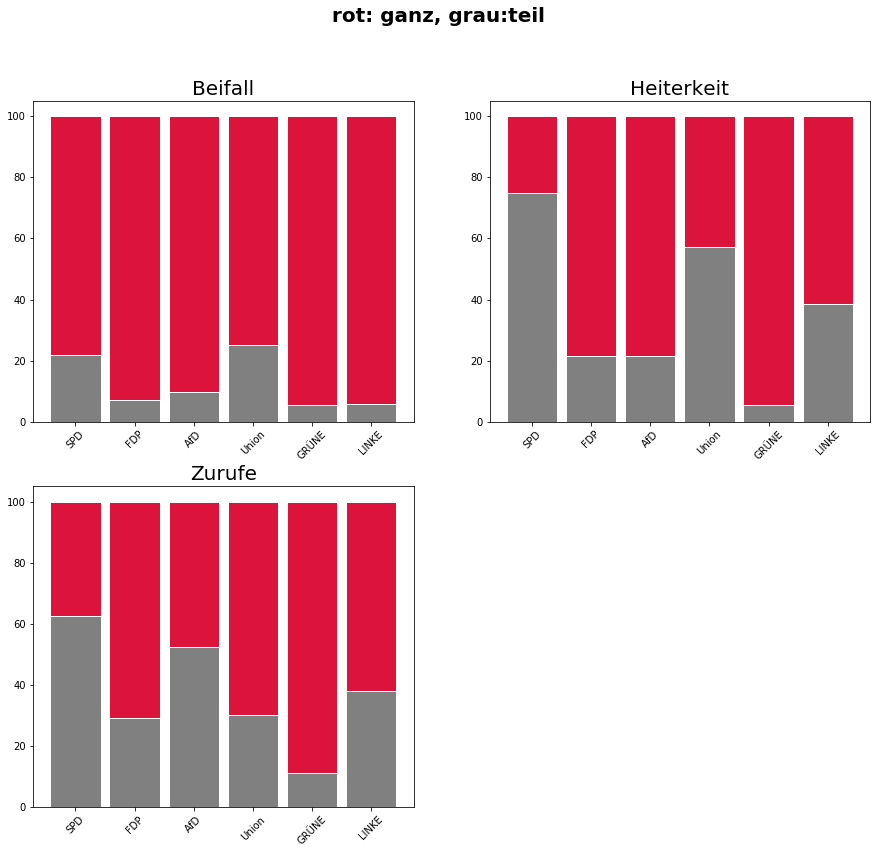

In [10]:
import matplotlib.pyplot as plt
# Einteilen des großen raw_data in jeweilige Aktion
Aktion = ('Beifall', 'Heiterkeit', 'Lachen', 'Zurufe', 'Widerspruch')
Aktion_dic = {}
Aktio = ['Beifall', 'Heiterkeit', 'Zurufe']
#for akt in Aktion:
#    Aktion_dic[akt] = eigenePart_teil_ganz_reaktion[[akt+'_teil', akt+'_ganz']]
    

# Darstellung
barWidth = 0.85
fig = plt.figure(figsize = (15, 13))
fig.suptitle('rot: ganz, grau:teil', fontsize = 20, weight = 'bold')
    
for akt, n in zip(Aktio, range(1, len(Aktion)+1)):
    Aktion_dic[akt] = eigenePart_teil_ganz_reaktion[[akt+'_teil', akt+'_ganz']]
    

    # Data
    raw_data = {'greyBars': Aktion_dic[akt][akt + '_teil'].values, 'redBars': Aktion_dic[akt][akt + '_ganz'].values}
    raw_data = pd.DataFrame(raw_data)
 
    # From raw value to percentage
    totals = [i+j for i,j in zip(raw_data['greyBars'], raw_data['redBars'])]
    greyBars = [i / j * 100 for i,j in zip(raw_data['greyBars'], totals)]
    redBars = [i / j * 100 for i,j in zip(raw_data['redBars'], totals)]

    # plot
    ax = fig.add_subplot(2,2,n)
    
    Parteien_kurz = ['SPD', 'FDP', 'AfD', 'Union', 'GRÜNE', 'LINKE']

    # Create green Bars
    ax.bar(Parteien_kurz, greyBars, color='grey', edgecolor='white', width=barWidth)
    # Create orange Bars
    ax.bar(Parteien_kurz, redBars, bottom=greyBars, color='crimson', edgecolor='white', width=barWidth)
    ax.set_title(str(akt), size = 20)
    
    # Custom x axis
    plt.xticks(Parteien_kurz, rotation =45)

## Gegenüberstellung Beifall

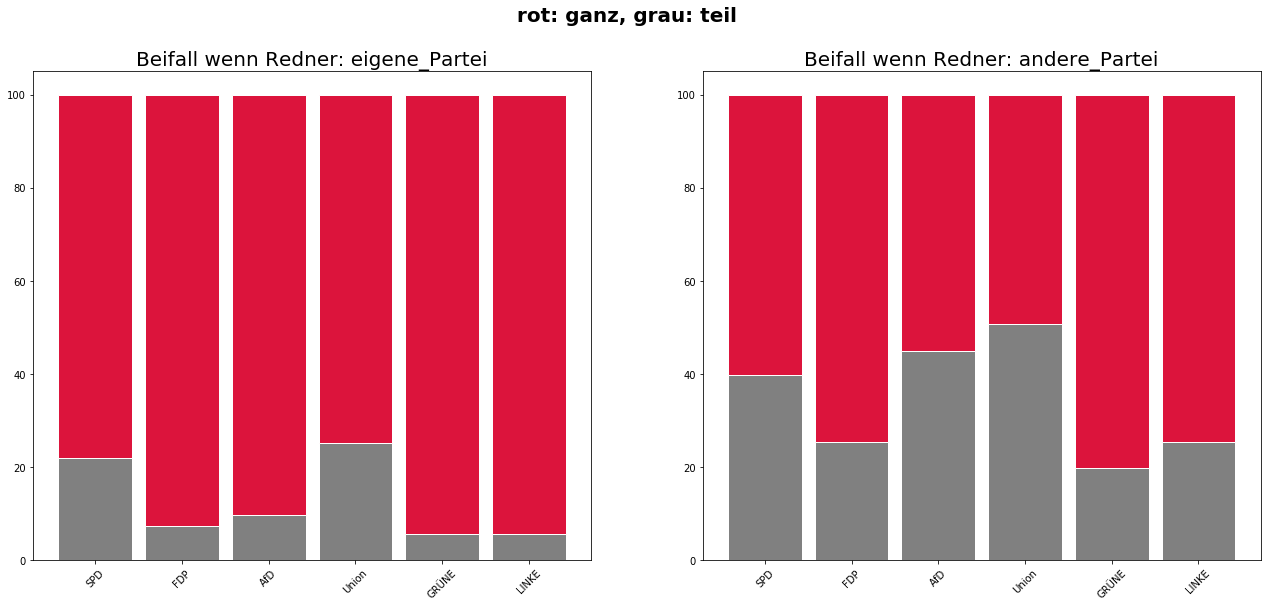

In [13]:
Redner_dic = {}
barWidth = 0.85
fig = plt.figure(figsize = (22, 9))
fig.suptitle('rot: ganz, grau: teil', fontsize = 20, weight = 'bold')

Redner_Partei = ['eigene_Partei', 'andere_Partei']
Redner_dic['eigene_Partei'] = eigenePart_teil_ganz_reaktion[['Beifall_ganz', 'Beifall_teil']]
Redner_dic['andere_Partei'] = anderePart_teil_ganz_reaktion[['Beifall_ganz', 'Beifall_teil']]

for Redner, n in zip(Redner_Partei, range(1,3)):
    # Data
    raw_data = {'greyBars': Redner_dic[Redner]['Beifall_teil'].values, 'redBars': Redner_dic[Redner]['Beifall_ganz'].values}
    df_raw = pd.DataFrame(raw_data)
 
    # From raw value to percentage
    totals = [i+j for i,j in zip(df_raw['greyBars'], df_raw['redBars'])]
    greyBars = [i / j * 100 for i,j in zip(df_raw['greyBars'], totals)]
    redBars = [i / j * 100 for i,j in zip(df_raw['redBars'], totals)]


    # plot
    ax = fig.add_subplot(1,2,n)

    Parteien_kurz = ['SPD', 'FDP', 'AfD', 'Union', 'GRÜNE', 'LINKE']

    # Create green Bars
    ax.bar(Parteien_kurz, greyBars, color='grey', edgecolor='white', width=barWidth)
    # Create orange Bars
    ax.bar(Parteien_kurz, redBars, bottom=greyBars, color='crimson', edgecolor='white', width=barWidth)
    ax.set_title('Beifall wenn Redner: ' + Redner, size = 20)

    # Custom x axis
    plt.xticks(Parteien_kurz, rotation =45)

## Beifall für eigene Redner vs für andere Redner

In [142]:
eigenePart_teil_ganz_reaktion['Beifall_Summe'] 

SPD                      1519
FDP                      1107
AfD                      1528
CDU/CSU                  1856
BÜNDNIS_90/DIE_GRÜNEN    1314
DIE_LINKE                1385
Name: Beifall_Summe, dtype: int64

In [143]:
anderePart_teil_ganz_reaktion['Beifall_Summe']

SPD                      11658
FDP                       7810
AfD                       3241
CDU/CSU                   9771
BÜNDNIS_90/DIE_GRÜNEN     9637
DIE_LINKE                 8712
Name: Beifall_Summe, dtype: int64

([<matplotlib.axis.XTick at 0x7f22f4ce04d0>,
 <a list of 6 Text xticklabel objects>)

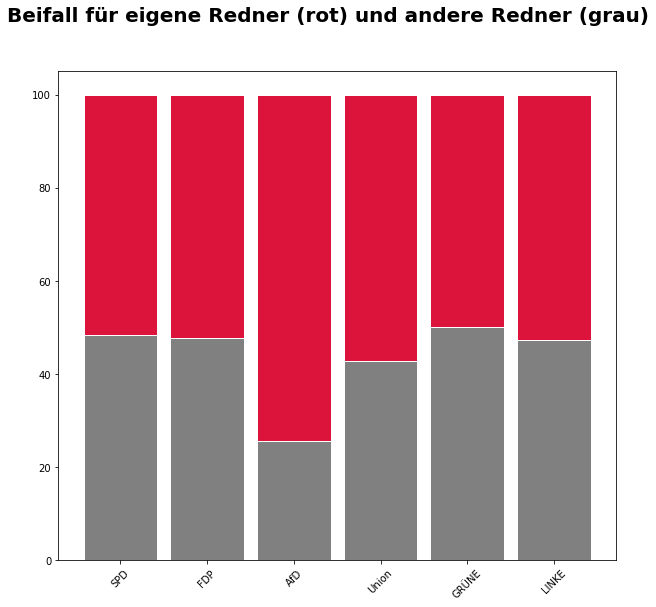

In [145]:
eigenePart_teil_ganz_reaktion['Beifall_Summe'] = eigenePart_teil_ganz_reaktion['Beifall_ganz'] +eigenePart_teil_ganz_reaktion['Beifall_teil']
anderePart_teil_ganz_reaktion['Beifall_Summe'] = anderePart_teil_ganz_reaktion['Beifall_ganz'] +anderePart_teil_ganz_reaktion['Beifall_teil']


Redner_dic = {}
barWidth = 0.85
fig = plt.figure(figsize = (10, 9))
fig.suptitle('Beifall für eigene Redner (rot) und andere Redner (grau)', fontsize = 20, weight = 'bold')

# Data
raw_data = {'greyBars': anderePart_teil_ganz_reaktion['Beifall_Summe'].values, 'redBars': eigenePart_teil_ganz_reaktion['Beifall_Summe'].values}
df_raw = pd.DataFrame(raw_data)
 
# From raw value to percentage
totals = [i+j for i,j in zip(df_raw['greyBars'], df_raw['redBars'])]
greyBars = [i / j * 100 for i,j in zip(df_raw['greyBars'], totals)]
redBars = [i / j * 100 for i,j in zip(df_raw['redBars'], totals)]


# plot
ax = fig.add_subplot(1,1,1)

Parteien_kurz = ['SPD', 'FDP', 'AfD', 'Union', 'GRÜNE', 'LINKE']

# Create green Bars
ax.bar(Parteien_kurz, greyBars, color='grey', edgecolor='white', width=barWidth)
# Create orange Bars
ax.bar(Parteien_kurz, redBars, bottom=greyBars, color='crimson', edgecolor='white', width=barWidth)
#ax.set_title('Beifall wenn Redner: ' + Redner, size = 20)

# Custom x axis
plt.xticks(Parteien_kurz, rotation =45)

### Entwicklung der Reaktionen über die Zeit

In [299]:
### Lade direkt dict mit datetime.date index um Graf zu erstellen
#pickle.dump(save_dic, open(PICKLE_FOLDER_PATH + 'Akt_Part_Date_dic.p', "wb" ))
Aktion_dic = pickle.load(open(PICKLE_FOLDER_PATH + 'Akt_Part_Date_dic.p', "rb" ))

In [124]:
# So oft tauchen die Parteien in den Daten pro Kategorie auf:
df_comment_akt = df[['Datum', 'Fraktion', 'SPD_Aktion1','SPD_Aktion2','FDP_Aktion1', 'FDP_Aktion2', 'AfD_Aktion1', 'AfD_Aktion2',
       'CDU/CSU_Aktion1', 'CDU/CSU_Aktion2', 'BÜNDNIS_90/DIE_GRÜNEN_Aktion1', 'BÜNDNIS_90/DIE_GRÜNEN_Aktion2',
       'DIE_LINKE_Aktion1','DIE_LINKE_Aktion2', 'DIE_LINKE_Akteur1', 'DIE_LINKE_Akteur2']]
# pd.pivot_table(df_comment_akt, index = 'SPD_Aktion2', aggfunc = np.count_nonzero )


parteien = ['SPD', 'FDP', 'AfD', 'CDU/CSU', 'BÜNDNIS_90/DIE_GRÜNEN', 'DIE_LINKE']


Aktionen = {}
Datum = list(set(df_comment_akt['Datum']))

for partei in parteien:
    akt_Beifall = []
    akt_Heiterkeit = []
    akt_Lachen = []
    akt_Zurufe = []
    akt_Widerspruch = []
    
    for date in set(df_comment_akt['Datum']):
    
        akt_Beifall.append(df_comment_akt.loc[(df_comment_akt['Datum'] == date) &
                ((df_comment_akt[str(partei)+'_Aktion1'] == 'Beifall')
                           |(df_comment_akt[str(partei)+'_Aktion2'] == 'Beifall')
                           |(df_comment_akt[str(partei)+'_Aktion1'] == 'Heiterkeit und Beifall')
                           |(df_comment_akt[str(partei)+'_Aktion2'] == 'Heiterkeit und Beifall')
                          )]['SPD_Aktion1'].count())
        akt_Heiterkeit.append(df_comment_akt.loc[(df_comment_akt['Datum'] == date) &
                ((df_comment_akt[str(partei)+'_Aktion1'] == 'Heiterkeit')
                       |(df_comment_akt[str(partei)+'_Aktion2'] == 'Heiterkeit')
                       |(df_comment_akt[str(partei)+'_Aktion1'] == 'Heiterkeit und Beifall')
                       |(df_comment_akt[str(partei)+'_Aktion2'] == 'Heiterkeit und Beifall')
                      )]['SPD_Aktion1'].count())
        akt_Lachen.append(df_comment_akt.loc[(df_comment_akt['Datum'] == date) &
                ((df_comment_akt[str(partei)+'_Aktion1'] == 'Lachen')
                       |(df_comment_akt[str(partei)+'_Aktion2'] == 'Lachen')
                      )]['SPD_Aktion1'].count())
        akt_Zurufe.append(df_comment_akt.loc[(df_comment_akt['Datum'] == date) &
                ((df_comment_akt[str(partei)+'_Aktion1'] == 'Weitere Zurufe')|
                       (df_comment_akt[str(partei)+'_Aktion2'] == 'Weitere Zurufe')|
                       (df_comment_akt[str(partei)+'_Aktion1'] == 'Zuruf')|
                       (df_comment_akt[str(partei)+'_Aktion2'] == 'Zuruf')|
                       (df_comment_akt[str(partei)+'_Aktion1'] == 'Zurufe')|
                       (df_comment_akt[str(partei)+'_Aktion2'] == 'Zurufe')
                      )]['SPD_Aktion1'].count())

        akt_Widerspruch.append(df_comment_akt.loc[(df_comment_akt['Datum'] == date) &
                        ((df_comment_akt[str(partei)+'_Aktion1'] == 'Widerspruch')
                       |(df_comment_akt[str(partei)+'_Aktion2'] == 'Widerspruch')
                      )]['SPD_Aktion1'].count())
    print(partei)    
    Aktionen[partei] = pd.DataFrame({'Beifall': akt_Beifall, 'Heiterkeit': akt_Heiterkeit, 'Lachen': akt_Lachen,
                         'Zurufe': akt_Zurufe, 'Widerspruch': akt_Widerspruch}, index=Datum)
for partei in parteien:
    Aktionen_Date[partei] = Aktionen_Date[partei].sort_index()

SPD2020-01-30 00:00:00
FDP2020-01-30 00:00:00
AfD2020-01-30 00:00:00
CDU/CSU2020-01-30 00:00:00
BÜNDNIS_90/DIE_GRÜNEN2020-01-30 00:00:00
DIE_LINKE2020-01-30 00:00:00


In [201]:
Aktion = ('Beifall', 'Heiterkeit', 'Lachen', 'Zurufe', 'Widerspruch')
Aktion_dic = {}

for akt in Aktion: 
    dic_akt = {}
    for partei in parteien:
        dic_akt[partei] =  Aktionen_Date[partei][akt]
    Aktion_dic[akt] = pd.concat(dic_akt, axis=1)

#### Bearbeite Index um Zeitraum begrenzen zu können

In [292]:
from datetime import datetime
from datetime import date

Aktion = ('Beifall', 'Heiterkeit', 'Lachen', 'Zurufe', 'Widerspruch')
for akt in Aktion:
    index_date = []
    for i in range(0, len(Aktion_dic[akt].index)):
        date = datetime.fromtimestamp(list(Aktion_dic[akt].index)[i].value/ 1000000000)
        index_date.append(datetime.date(date))
    Aktion_dic[akt].index = index_date   

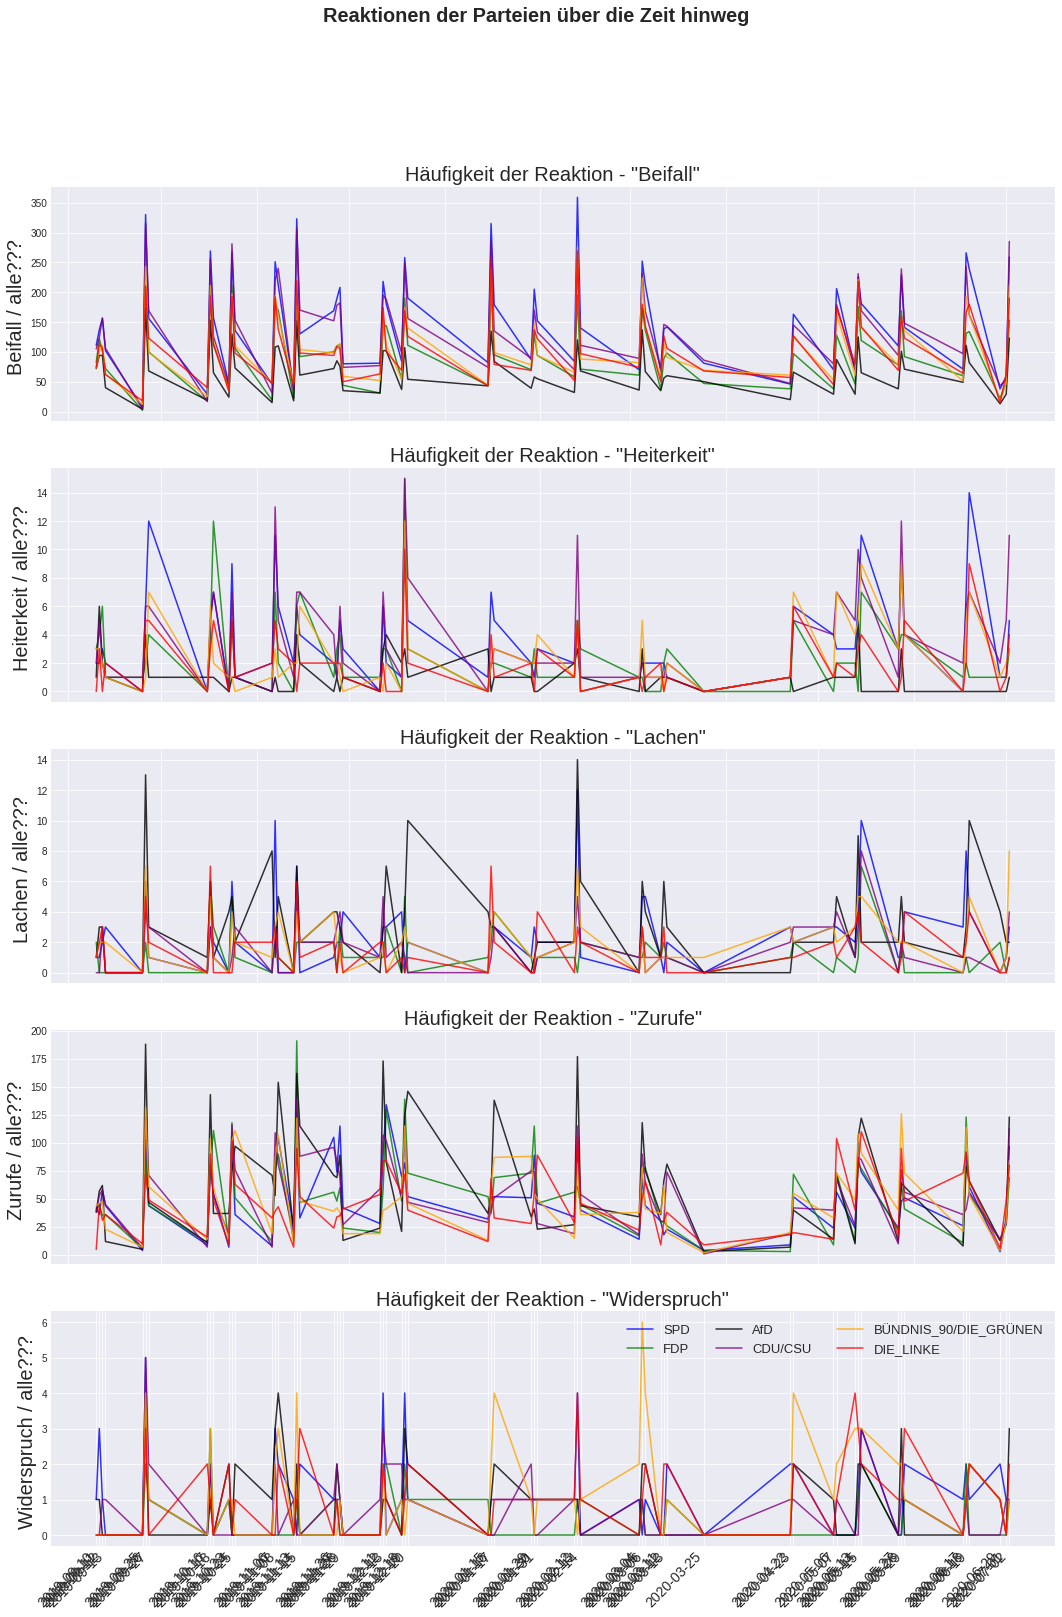

In [298]:
pd.set_option('display.max_rows', None)
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import numpy as np
import datetime

Aktion_dic = save_dic

plt.style.use('seaborn-darkgrid')
my_palette = ['blue', 'green', 'black', 'purple', 'orange', 'red']

fig = plt.figure(figsize = (18, 25))
fig.tight_layout()
fig.suptitle('Reaktionen der Parteien über die Zeit hinweg', fontsize = 20, weight = 'bold')


for akt, n in zip(Aktion, range(1,len(Aktion)+1)):
    ax = fig.add_subplot(5,1,n)
    Aktion_dic[akt] = Aktion_dic[akt].loc[Aktion_dic[akt].index > datetime.date(2019,9,1)]
    
    num=0
    for column in Aktion_dic[akt]:
        ax.plot(Aktion_dic[akt].index, Aktion_dic[akt][column], color = my_palette[num], alpha=0.8, label = column)
        num+=1
#     ax.plot(partei_piv_emo_rel.index, partei_piv_emo_rel[emo]['AfD'], marker='', color='blue', linewidth=4, alpha=0.7)
    ax.set_title('Häufigkeit der Reaktion - "' +akt+ '"', size = 20)
    ylab = ax.set_ylabel(akt +' / alle??? ', size = 20)
    
    if n <= 4:
        plt.setp(ax.get_xticklabels(), visible=False)
    else:
        x_tags = plt.xticks(Aktion_dic[akt].index, fontsize = 14, rotation = 45, ha = "right")
    if n == 5:
        plt.legend(loc = 1, ncol = 3, fontsize = 13)



## Namen der häufigen Zurufer
Notiz: /Plenum/pickle_TUWien_plenar/Plenum_Kom_Sent_Wien_TB_Akteur -> Pivot Tabelle zeigt zu enig Aktionen pro Akteur

#### Erstelle df in dem alle Aktionen 'Zuruf' enthalten sind

In [17]:
#df = df_all
dic_akteur = {}
parteien = ['SPD', 'FDP', 'AfD', 'CDU/CSU', 'BÜNDNIS_90/DIE_GRÜNEN', 'DIE_LINKE']
for partei in parteien:
    
     dic_akteur[partei+'_df'] = df.loc[((df[str(partei)+'_Aktion1'] == 'Weitere Zurufe')|
                       (df[str(partei)+'_Aktion2'] == 'Weitere Zurufe')|
                       (df[str(partei)+'_Aktion1'] == 'Zuruf')|
                       (df[str(partei)+'_Aktion2'] == 'Zuruf')|
                       (df[str(partei)+'_Aktion1'] == 'Zurufe')|
                       (df[str(partei)+'_Aktion2'] == 'Zurufe')
                      )]
df_akteur = pd.concat(dic_akteur, axis = 0)

#### Verwende df_akteur um die Akteure aus verschiedenen Parteien in eine Zeile zu schreiben

In [18]:
part_dic = {}
for partei in parteien:

    part_dic[partei+'akt_1'] = (df_akteur.loc[df_akteur[str(partei)+'_Akteur1'] != ''][['Rede_ID', str(partei)+'_Akteur1', 'Datum']])
    part_dic[partei+'akt_1']['Partei'] = partei
    part_dic[partei+'akt_1'].columns = [['Rede_ID', 'Akteur', 'Datum' ,'Partei']]
    

    part_dic[partei+'akt_2'] = (df_akteur.loc[df_akteur[str(partei)+'_Akteur2'] != ''][['Rede_ID', str(partei)+'_Akteur2', 'Datum']])
    part_dic[partei+'akt_2']['Partei'] = partei
    part_dic[partei+'akt_2'].columns = [['Rede_ID', 'Akteur', 'Datum' ,'Partei']]
    
akteure_df = pd.concat(part_dic, axis = 0)
akteure_df.index = akteure_df.index.get_level_values(0) # Get rid od line Multiindex
akteure_df.columns = akteure_df.columns.map(''.join)    # Get rid od column Multiindex

# Lösche alle Einträge die 'ganze' oder 'teile' heißten -> sind nicht eindeutig und sind irrelevant für Auswertung
akteure_df = akteure_df.loc[(akteure_df['Akteur']!='ganze') & (akteure_df['Akteur']!='teile')] 

#### Erstelle Pivot Tabelle und plotte Grafik

In [19]:
pd.set_option('display.max_rows', None)
partei_piv_dic = {}

for partei in parteien:
    partei_mdp = akteure_df[akteure_df['Partei'] == partei]
    patei_names = partei_mdp[['Akteur', 'Datum']]
    partei_piv_dic[partei] = pd.pivot_table(patei_names, index = 'Akteur', aggfunc = np.count_nonzero )

In [22]:
partei_piv_df = []
for party in parteien:
    df = partei_piv_dic[party].sort_values(by ='Datum', ascending=False).head(15)
    
    df = df.rename(columns={"Datum":"count"})
    df['Akteur'] = df.index
    df = df.iloc[0:].reset_index(drop=True)
    df['Partei'] = party
    partei_piv_df.append(df)
    
result = pd.concat(partei_piv_df)
result = result.iloc[0:].reset_index(drop=True)
my_palette = ['blue', 'orange', 'green', 'purple', 'red', 'black']
colors = ['black','red','green', 'purple', 'orange', 'blue']

result.index = result['Akteur']
result = result[['count', 'Partei']]

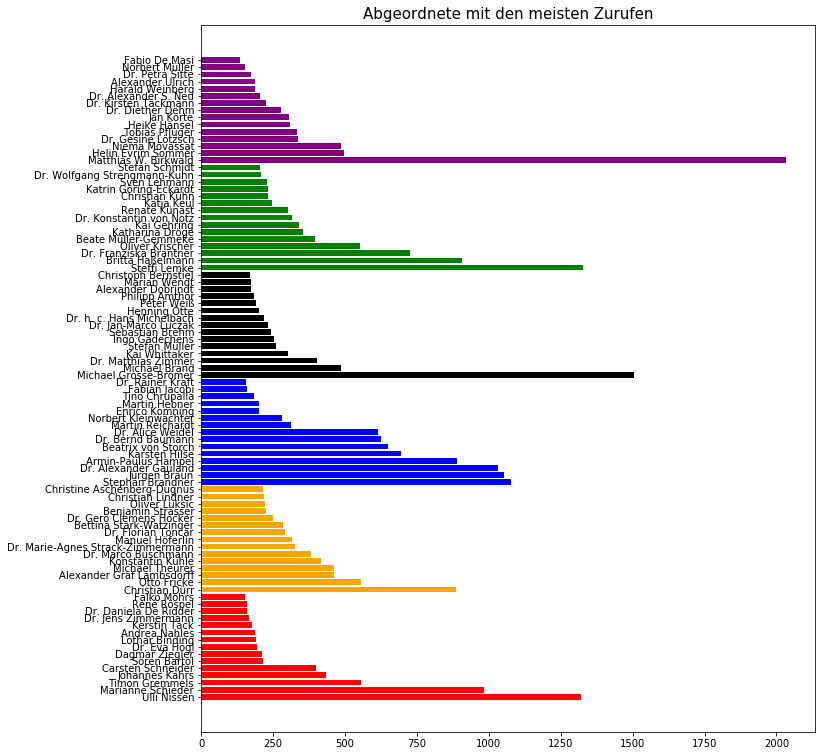

In [23]:
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (11, 13))
ax = fig.add_subplot(111)
ax.set_title('Abgeordnete mit den meisten Zurufen', fontsize = 15)


for user in result.index:
    if result['Partei'][user] == 'AfD':
        ax = plt.barh(user, result['count'][user], color = 'blue')
    elif result['Partei'][user] == 'FDP':
        ax = plt.barh(user, result['count'][user], color = 'orange')
    elif result['Partei'][user] == 'DIE_LINKE':
        ax = plt.barh(user, result['count'][user], color = 'purple')        
    elif result['Partei'][user] == 'BÜNDNIS_90/DIE_GRÜNEN':
        ax = plt.barh(user, result['count'][user], color = 'green')        
    elif result['Partei'][user] == 'CDU/CSU':
        ax = plt.barh(user, result['count'][user], color = 'black')               
    else:
        ax = plt.barh(user, result['count'][user], color = 'red')